In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[125.75 159.75  99.25]
   [132.5  165.5  111.  ]
   [141.25 173.25 125.  ]
   ...
   [127.   155.   105.  ]
   [116.25 144.25  96.  ]
   [ 72.5  100.    56.5 ]]

  [[142.5  176.   117.5 ]
   [142.5  175.25 122.5 ]
   [156.   187.5  141.5 ]
   ...
   [116.   146.25  92.  ]
   [109.75 138.25  86.25]
   [111.75 139.75  89.75]]

  [[148.   178.   126.5 ]
   [155.75 185.   137.  ]
   [139.   167.25 125.75]
   ...
   [104.   135.    76.25]
   [101.75 132.75  74.25]
   [111.5  141.    83.  ]]

  ...

  [[ 13.    31.    15.  ]
   [ 13.    31.    15.  ]
   [ 13.    31.    15.  ]
   ...
   [ 14.5   30.5   17.5 ]
   [ 14.25  30.25  17.25]
   [ 18.25  34.25  21.25]]

  [[ 12.    30.    14.  ]
   [ 12.    30.    14.  ]
   [ 12.    30.    14.  ]
   ...
   [ 14.5   30.5   17.5 ]
   [ 16.    32.    19.  ]
   [ 15.75  31.75  18.75]]

  [[ 11.5   29.5   13.5 ]
   [ 11.5   29.5   13.5 ]
   [ 11.5   29.5   13.5 ]
   ...
   [ 14.5   30.5   17.5 ]
   [ 17.75  33.75  20.75]
   [ 14.    30.    1

In [6]:
#BUILDING MODEL

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img , img_to_array
from PIL import Image


In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
##BUILDING CONVOLUTIONAL LAYER

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

D:\PlantDisease\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [19]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [20]:
#Compiling Model

In [21]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Model Training

In [24]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1417s 643ms/step - accuracy: 0.4044 - loss: 2.1112 - val_accuracy: 0.8098 - val_loss: 0.5843
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1280s 583ms/step - accuracy: 0.8277 - loss: 0.5469 - val_accuracy: 0.8924 - val_loss: 0.3299
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1359s 619ms/step - accuracy: 0.9045 - loss: 0.2993 - val_accuracy: 0.9138 - val_loss: 0.2643
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1414s 644ms/step - accuracy: 0.9344 - loss: 0.2004 - val_accuracy: 0.9318 - val_loss: 0.2101
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1253s 570ms/step - accuracy: 0.9516 - loss: 0.1435 - val_accuracy: 0.9514 - val_loss: 0.1540
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1249s 569ms/step - accuracy: 0.9646 - loss: 0.1074 - val_accuracy: 0.9602 - val_loss: 0.1259
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1250s 569ms/step - accuracy: 0.9711 - loss: 0.0868 - val_accuracy: 0.9545 - val_loss: 0.1529
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1248s 568ms/s

In [25]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 288s 131ms/step - accuracy: 0.9842 - loss: 0.0490
Training accuracy: 0.9856604337692261


In [26]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 72s 131ms/step - accuracy: 0.9586 - loss: 0.1365
Validation accuracy: 0.9603345990180969


In [27]:
#Evaluation Model

In [28]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 285s 130ms/step - accuracy: 0.9842 - loss: 0.0491
Training accuracy: 0.9856604337692261


In [29]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 73s 133ms/step - accuracy: 0.9592 - loss: 0.1344
Validation accuracy: 0.9603345990180969


In [30]:
#SAVING MODEL

In [31]:
cnn.save('trained_plant_disease_model.keras')

In [32]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6018208861351013,
  0.8545273542404175,
  0.9132939577102661,
  0.9401095509529114,
  0.9552030563354492,
  0.9648481607437134,
  0.9723735451698303,
  0.9769400358200073,
  0.9795718193054199,
  0.9824454188346863],
 'loss': [1.3512005805969238,
  0.46109437942504883,
  0.26858487725257874,
  0.1814192831516266,
  0.13454000651836395,
  0.10614627599716187,
  0.0831201896071434,
  0.07176785171031952,
  0.06329550594091415,
  0.055084098130464554],
 'val_accuracy': [0.8097541332244873,
  0.892442524433136,
  0.9137833118438721,
  0.9317664504051208,
  0.9513999819755554,
  0.9601638913154602,
  0.9545299410820007,
  0.9679604172706604,
  0.9664807915687561,
  0.9603345990180969],
 'val_loss': [0.5842677354812622,
  0.32992905378341675,
  0.26431283354759216,
  0.21009419858455658,
  0.15402019023895264,
  0.12593010067939758,
  0.15290416777133942,
  0.12060225754976273,
  0.1113666519522667,
  0.13326214253902435]}

In [33]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [34]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [35]:
#Accuracy Visualization

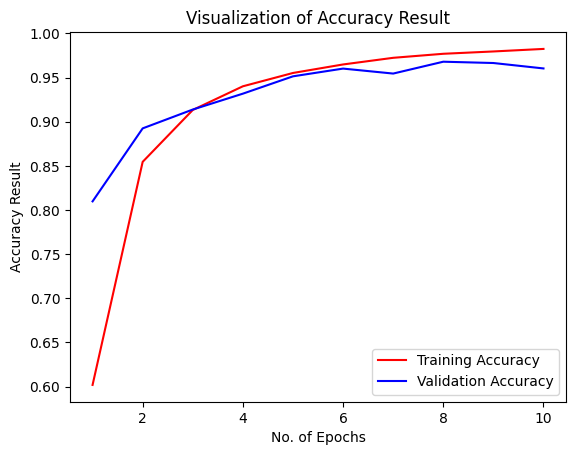

In [36]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [37]:
#metrics for model evaluation

In [38]:
class_name = validation_set.class_names

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [40]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 275s 16ms/step


In [41]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [42]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [45]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.95      0.94       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.99      0.87      0.93       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.96      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.94      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.96      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.93      0.

In [46]:
#Confusion Matrix Visualization

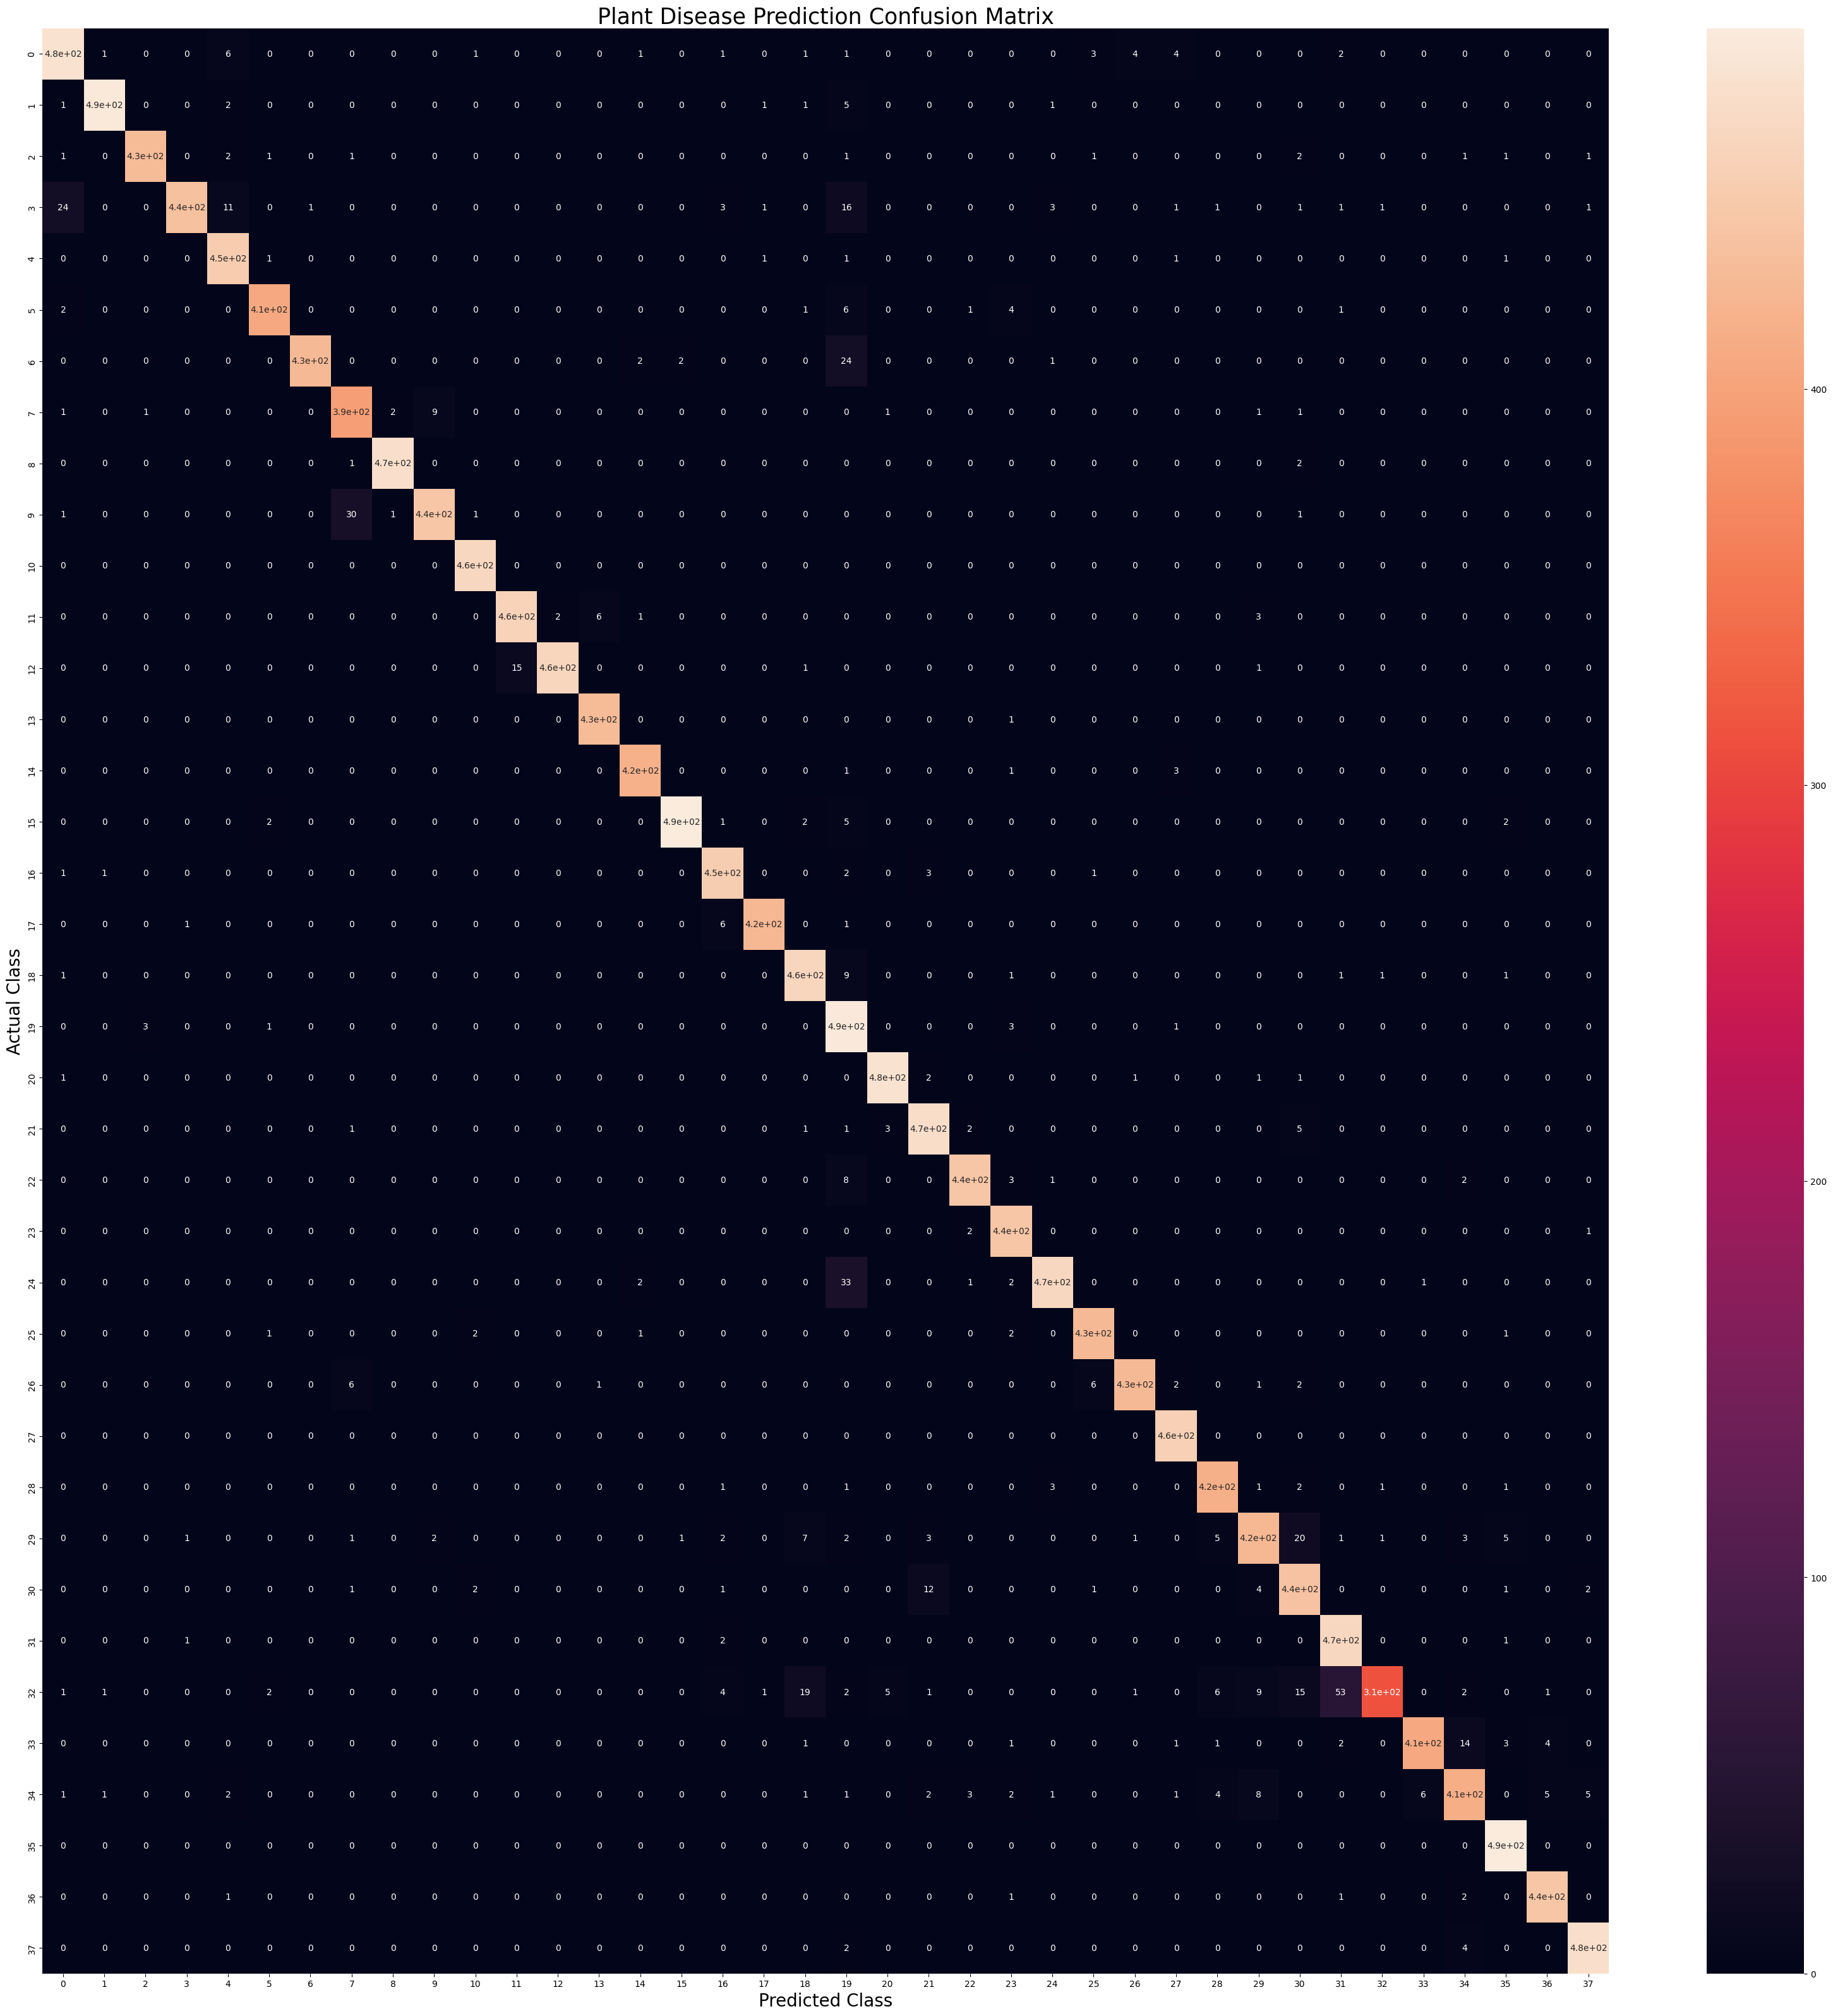

In [47]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()